In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate
from pycaret.regression import *
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('trained_preprocessed.csv')
df

,sleep_hours,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,6.400000,2015,2,19,0,0,0,0,1,0,0
1,7.583333,2015,2,20,1,0,0,0,0,0,0
2,6.350000,2015,2,21,0,0,1,0,0,0,0
3,6.500000,2015,2,22,0,0,0,1,0,0,0
4,8.916667,2015,2,23,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2349,7.933333,2021,12,25,0,0,1,0,0,0,0
2350,3.850000,2021,12,26,0,0,0,1,0,0,0
2351,6.175000,2021,12,29,0,0,0,0,0,0,1
2352,5.158333,2021,12,30,0,0,0,0,1,0,0


In [3]:
reg = setup(data=df,target='sleep_hours')

,Description,Value
0,Session id,4335
1,Target,sleep_hours
2,Target type,Regression
3,Original data shape,"(2354, 11)"
4,Transformed data shape,"(2354, 11)"
5,Transformed train set shape,"(1647, 11)"
6,Transformed test set shape,"(707, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [4]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.7836,1.2108,1.0937,0.7344,0.1325,0.1144,0.5880
catboost,CatBoost Regressor,0.8103,1.2452,1.1097,0.7259,0.1355,0.1191,1.1800
lightgbm,Light Gradient Boosting Machine,0.8038,1.2527,1.1122,0.7242,0.1354,0.1180,0.5920
gbr,Gradient Boosting Regressor,0.8112,1.3006,1.1316,0.7136,0.1357,0.1188,0.2490
et,Extra Trees Regressor,0.8283,1.3717,1.1621,0.7006,0.1405,0.1205,0.4630
xgboost,Extreme Gradient Boosting,0.8932,1.4608,1.2037,0.6802,0.1480,0.1310,0.2160
dt,Decision Tree Regressor,1.0978,2.2908,1.5074,0.4949,0.1822,0.1572,0.0470
ada,AdaBoost Regressor,1.2146,2.8894,1.6893,0.3660,0.1881,0.1732,0.1380
knn,K Neighbors Regressor,1.3467,3.7642,1.9346,0.1848,0.2061,0.1825,0.0520
br,Bayesian Ridge,1.3856,4.6416,2.1448,0.0057,0.2220,0.1802,0.0470


RandomForestRegressor(n_jobs=-1, random_state=4335)

In [5]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.7836,1.2108,1.0937,0.7344,0.1325,0.1144,0.1950
catboost,CatBoost Regressor,0.8103,1.2452,1.1097,0.7259,0.1355,0.1191,0.1140
lightgbm,Light Gradient Boosting Machine,0.8038,1.2527,1.1122,0.7242,0.1354,0.1180,0.1260
gbr,Gradient Boosting Regressor,0.8112,1.3006,1.1316,0.7136,0.1357,0.1188,0.1430
et,Extra Trees Regressor,0.8283,1.3717,1.1621,0.7006,0.1405,0.1205,0.2220
xgboost,Extreme Gradient Boosting,0.8932,1.4608,1.2037,0.6802,0.1480,0.1310,0.1160
dt,Decision Tree Regressor,1.0978,2.2908,1.5074,0.4949,0.1822,0.1572,0.1110
ada,AdaBoost Regressor,1.2146,2.8894,1.6893,0.3660,0.1881,0.1732,0.1490
knn,K Neighbors Regressor,1.3467,3.7642,1.9346,0.1848,0.2061,0.1825,0.1120
br,Bayesian Ridge,1.3856,4.6416,2.1448,0.0057,0.2220,0.1802,0.1090


In [6]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
pred_holdout = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.8789,1.5152,1.2309,0.7175,0.1534,0.1326


In [8]:
test = pd.read_csv('test_preprocessed.csv')

In [9]:
test

,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,2022,1,1,0,0,1,0,0,0,0
1,2022,1,2,0,0,0,1,0,0,0
2,2022,1,3,0,1,0,0,0,0,0
3,2022,1,4,0,0,0,0,0,1,0
4,2022,1,5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
414,2023,3,12,0,0,0,1,0,0,0
415,2023,3,13,0,1,0,0,0,0,0
416,2023,3,14,0,0,0,0,0,1,0
417,2023,3,15,0,0,0,0,0,0,1


In [10]:
rf_pycaret_pred = predict_model(best, data=test)

In [11]:
rf_pycaret_pred

,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,prediction_label
0,2022,1,1,0,0,1,0,0,0,0,6.349250
1,2022,1,2,0,0,0,1,0,0,0,6.250750
2,2022,1,3,0,1,0,0,0,0,0,6.178167
3,2022,1,4,0,0,0,0,0,1,0,6.249417
4,2022,1,5,0,0,0,0,0,0,1,6.383500
...,...,...,...,...,...,...,...,...,...,...,...
414,2023,3,12,0,0,0,1,0,0,0,7.648583
415,2023,3,13,0,1,0,0,0,0,0,7.109750
416,2023,3,14,0,0,0,0,0,1,0,6.706583
417,2023,3,15,0,0,0,0,0,0,1,6.666000


In [12]:
sub = pd.read_csv('sample_submission.csv')

In [14]:
sub['sleep_hours'] = rf_pycaret_pred['prediction_label']

In [15]:
sub

,date,sleep_hours
0,2022-01-01,6.349250
1,2022-01-02,6.250750
2,2022-01-03,6.178167
3,2022-01-04,6.249417
4,2022-01-05,6.383500
...,...,...
414,2023-03-12,7.648583
415,2023-03-13,7.109750
416,2023-03-14,6.706583
417,2023-03-15,6.666000


In [16]:
#sub.to_csv('pycaret_rf_1.csv',index=False)

<AxesSubplot:>

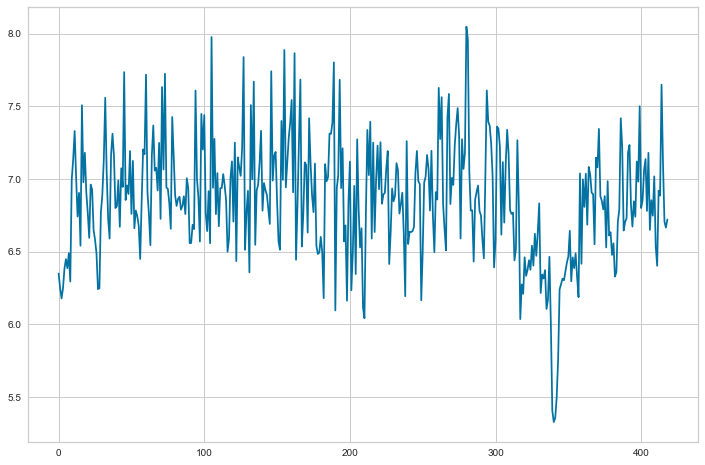

In [18]:
sub['sleep_hours'].plot(figsize=(12,8))

In [45]:
df_original = pd.read_csv('train.csv',parse_dates=['date'])

In [46]:
from pycaret.regression import RegressionExperiment

In [47]:
s = RegressionExperiment()

In [48]:
s.setup(df_original,target='sleep_hours',session_id=123)

,Description,Value
0,Session id,123
1,Target,sleep_hours
2,Target type,Regression
3,Original data shape,"(2354, 2)"
4,Transformed data shape,"(2354, 4)"
5,Transformed train set shape,"(1647, 4)"
6,Transformed test set shape,"(707, 4)"
7,Date features,1
8,Preprocess,True
9,Imputation type,simple


In [49]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8312,1.3149,1.1431,0.7123,0.1388,0.1224,0.5720
gbr,Gradient Boosting Regressor,0.8204,1.3193,1.1430,0.7117,0.1383,0.1210,0.2710
catboost,CatBoost Regressor,0.8430,1.3231,1.1468,0.7093,0.1401,0.1240,1.0630
rf,Random Forest Regressor,0.8713,1.4689,1.2071,0.6763,0.1441,0.1263,0.4820
xgboost,Extreme Gradient Boosting,0.9641,1.7024,1.3016,0.6255,0.1577,0.1404,0.2800
et,Extra Trees Regressor,0.9349,1.7417,1.3151,0.6145,0.1532,0.1337,0.4550
dt,Decision Tree Regressor,1.1509,2.4552,1.5633,0.4590,0.1919,0.1648,0.1370
knn,K Neighbors Regressor,1.2051,3.0765,1.7434,0.3329,0.1885,0.1652,0.1270
ada,AdaBoost Regressor,1.3214,3.4134,1.8438,0.2541,0.2009,0.1858,0.1590
ridge,Ridge Regression,1.3680,4.6230,2.1411,0.0030,0.2222,0.1801,0.1230


In [52]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [51]:
pred_hold = s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.8180,1.3405,1.1578,0.7538,0.1457,0.1245


In [58]:
test_original = pd.read_csv('test.csv',parse_dates=['date'])

In [59]:
test_original.drop('sleep_hours',axis=1,inplace=True)

In [60]:
preds_pycaret_2 = s.predict_model(best, test_original)

In [61]:
preds_pycaret_2

,date,prediction_label
0,2022-01-01,6.278938
1,2022-01-02,6.073471
2,2022-01-03,6.122313
3,2022-01-04,6.214624
4,2022-01-05,6.215573
...,...,...
414,2023-03-12,7.185510
415,2023-03-13,7.272529
416,2023-03-14,7.277682
417,2023-03-15,7.415251


<AxesSubplot:>

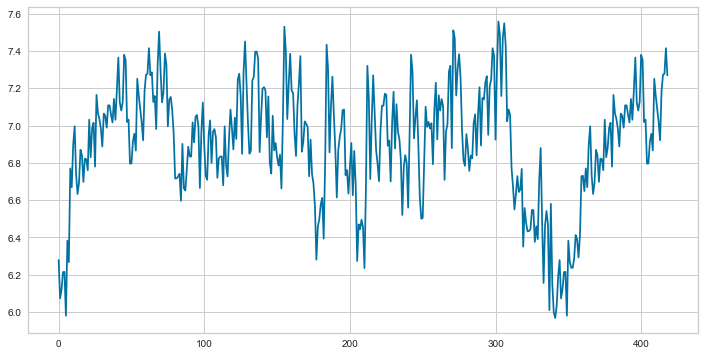

In [62]:
preds_pycaret_2['prediction_label'].plot(figsize=(12,6))

In [64]:
preds_pycaret_2.rename({'prediction_label':'sleep_hours'},axis=1,inplace=True)

In [66]:
#preds_pycaret_2.to_csv('pycaret_lgbm_1.csv',index=False)

In [67]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold

In [76]:
X = df.drop('sleep_hours',axis=1)
y = df['sleep_hours']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
X_train

,year,month,day,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
1135,2018,7,31,0,0,0,0,0,1,0
37,2015,5,15,1,0,0,0,0,0,0
123,2015,10,2,1,0,0,0,0,0,0
2046,2021,2,19,1,0,0,0,0,0,0
394,2016,7,3,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1638,2019,12,30,0,1,0,0,0,0,0
1095,2018,6,21,0,0,0,0,1,0,0
1130,2018,7,26,0,0,0,0,1,0,0
1294,2019,1,15,0,0,0,0,0,1,0


In [79]:
s = RegressionExperiment()

In [80]:
s.setup(data=X_train,target=y_train, session_id=123)

,Description,Value
0,Session id,123
1,Target,sleep_hours
2,Target type,Regression
3,Original data shape,"(1577, 11)"
4,Transformed data shape,"(1577, 11)"
5,Transformed train set shape,"(1103, 11)"
6,Transformed test set shape,"(474, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [81]:
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.8493,1.4691,1.2021,0.7054,0.1439,0.1232,0.6090
catboost,CatBoost Regressor,0.8821,1.5533,1.2388,0.6898,0.1494,0.1291,1.3250
lightgbm,Light Gradient Boosting Machine,0.8781,1.5563,1.2390,0.6897,0.1487,0.1285,0.6680
gbr,Gradient Boosting Regressor,0.8963,1.6311,1.2671,0.6763,0.1500,0.1306,0.4590
et,Extra Trees Regressor,0.9144,1.7008,1.2943,0.6595,0.1543,0.1327,0.4700
xgboost,Extreme Gradient Boosting,1.0182,1.9696,1.3977,0.6042,0.1687,0.1472,0.3540
dt,Decision Tree Regressor,1.1999,2.9295,1.6982,0.4086,0.2112,0.1714,0.2260
ada,AdaBoost Regressor,1.3529,3.5542,1.8787,0.2803,0.2061,0.1917,0.2320
knn,K Neighbors Regressor,1.4227,4.2985,2.0646,0.1364,0.2180,0.1919,0.1810
br,Bayesian Ridge,1.4472,5.0792,2.2429,-0.0095,0.2317,0.1888,0.2030


In [83]:
rf_1 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9010,1.8826,1.3721,0.6807,0.1681,0.1378
1,0.8408,1.5311,1.2374,0.5939,0.1458,0.1222
2,0.7025,0.8976,0.9474,0.8124,0.1187,0.1026
3,0.7410,1.0546,1.0269,0.7188,0.1273,0.1102
4,0.7769,1.0572,1.0282,0.8245,0.1266,0.1114
5,0.7537,1.0143,1.0071,0.7345,0.1349,0.1179
6,0.7479,1.0700,1.0344,0.7789,0.1188,0.1053
7,0.8380,1.3013,1.1407,0.7678,0.1319,0.1180
8,0.8157,1.2512,1.1186,0.6781,0.1400,0.1189


In [86]:
s.evaluate_model(rf_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Let's use H2O

In [92]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# init
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 mins 36 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,"14 days, 10 hours and 19 minutes"
H2O_cluster_name:,H2O_from_python_HP_ey2u9d
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.729 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [99]:
df_h2o  = h2o.import_file('trained_preprocessed.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [100]:
df_h2o_test = h2o.import_file('test_preprocessed.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [106]:
train_h2o,test_h2o = df_h2o.split_frame(ratios=[0.8],seed=42)

In [107]:
train_h2o.columns[1:]

['year',
 'month',
 'day',
 'dow_Friday',
 'dow_Monday',
 'dow_Saturday',
 'dow_Sunday',
 'dow_Thursday',
 'dow_Tuesday',
 'dow_Wednesday']

In [108]:
glm_1 = H2OGeneralizedLinearEstimator(alpha=0.25)

In [109]:
glm_1.train(x = train.columns[1:] ,y='sleep_hours',training_frame=train_h2o)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1679636002714_1


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.25, lambda = 6.93E-4 )  10                            10                             1                       py_5_sid_ab85

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 4.694471024417982
RMSE: 2.1666728004980316
MAE: 1.3934667619749512
RMSLE: 0.22652553645432905
Mean Residual Deviance: 4.694471024417982
R^2: 0.01723654185854373
Null degrees of freedom: 1883
Residual degrees of freedom: 1873
Null deviance: 8999.503732800118
Residual deviance: 8844.383410003478
AIC: 8283.950559168443

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  -------------------
    2023-03-24 01:46:32  0.000 sec   0             8999.503791099021          4.776806683173578
    2023-03-24 01:46:32  0.079 sec   1                                                           2.1666728004980316  4.694471024417982    1.3934667619749512  0.01723654185854373

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
year           0.187607               1                    0.259486
month          0.159624               0.850844             0.220782
dow_Saturday   0.0902947              0.481298             0.12489
dow_Monday     0.0856252              0.456408             0.118431
dow_Sunday     0.0500644              0.266858             0.069246
dow_Thursday   0.0498707              0.265826             0.068978
day            0.0429664              0.229024             0.0594285
dow_Wednesday  0.0372517              0.198563             0.0515242
dow_Tuesday    0.0150465              0.0802021            0.0208113
dow_Friday     0.00464319             0.0247496            0.00642218

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [110]:
pred_h2o = glm_1.predict(test_h2o)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [123]:
glm_1.rmse()

2.1666728004980316

## NOT A GOOD MODEL...VERY HIGH RMSE